FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    6/6/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


WC_ABS_GoM21Su_ID2122 - is fucked up 

!STOPED ON PW_ID2123!


In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/Mixing_experiment_1_st.16_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/Mixing_experiment_1_st.16_plot.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/Mixing_experiment_1_st.16_outputs.csv'
files

['../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_innital_Absorbance__1__01-48-25-438.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt',
 '../../../CDOM_DATA/GOM22SP/Mixing_experiment_1_st.16\\BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt',
 '../../../CDOM_DATA

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM21SU thats not PW
#X = .4875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

#X = .001

#X = .01


PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    #xi = np.arange(189,523,1)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [27]:
#EDIT HERE
n = 6 # how many underscore breaks 
stri = 3 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,BBL_innital_Absorbance__1__01-48-25-438.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt,BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt,BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt,BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt,BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt,BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt,BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt,BBL_RHZ_MIXED_time_Absorbance__16__02-17-18-513.txt,...,BBL_RHZ_MIXED_time_Absorbance__6__02-12-18-345.txt,BBL_RHZ_MIXED_time_Absorbance__7__02-12-48-402.txt,BBL_RHZ_MIXED_time_Absorbance__8__02-13-18-460.txt,BBL_RHZ_MIXED_time_Absorbance__9__02-13-48-497.txt,BBL_RHZ_MIX_time_Absorbance__0__01-57-42-534.txt,BBL_RHZ_MIX_time_Absorbance__0__02-06-47-428.txt,BBL_RHZ_MIX_time_Absorbance__1__01-58-12-575.txt,BBL_RHZ_MIX_time_Absorbance__2__01-58-42-352.txt,BBL_RHZ_MIX_time_Absorbance__3__01-59-12-383.txt,RHZ_innital_Absorbance__0__01-36-43-937.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.007574,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087
190,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.007574,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087
191,0.036208,-0.563926,-0.831421,-1.073900,-0.576182,-1.063501,-0.992837,-1.194430,-1.084298,-1.171978,...,-0.757685,-0.397610,-0.952897,-1.063501,-1.971778,-0.872543,-0.616961,-0.610450,-1.396804,-0.538063
192,0.471958,-6.020339,-4.848569,-3.494967,-5.337256,-5.095587,-5.562513,-5.797409,-5.327381,-5.893078,...,-4.464563,-4.470733,-4.682487,-5.351800,-2.913981,-4.744934,-3.489649,-0.034378,0.526334,1.420204
193,-3.475112,-0.823083,-1.111467,-1.255644,-0.692965,-0.540175,-1.027415,-1.065510,-1.272925,-1.381562,...,0.222494,-0.770210,-1.321609,-1.200710,1.536958,-0.991352,-1.095173,-0.697167,-0.805361,1.342656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.747693,0.308972,0.268675,0.288372,0.189558,0.366772,0.210951,0.223929,0.241560,0.187460,...,0.341393,0.142533,0.292985,0.385857,0.671324,0.548820,0.376946,0.496784,0.494357,0.204203
877,0.602262,0.204378,0.156172,0.000838,0.076826,0.093214,-0.117497,0.231480,0.032883,0.078759,...,0.187175,0.261003,0.213656,0.070767,0.443957,0.357445,0.080286,0.353915,0.415862,0.320731
878,0.685932,0.362897,0.399743,0.119820,0.212441,0.003394,0.277334,0.292415,0.155289,0.037262,...,0.317871,0.523520,0.307989,0.324119,0.731810,0.394311,0.678115,0.569499,0.415658,0.234203


In [28]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
#d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code
#names = d.columns.str.rsplit('_', n=5).str[3]
#names = d.columns.str.rsplit('ID', n=2).str[1]
#names = names.str.rsplit('_', n=4).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
#df = d.groupby(names, axis=1).mean()
df

,BBL_innital_Absorbance__1__01-48-25-438.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt,BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt,BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt,BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt,BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt,BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt,BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt,BBL_RHZ_MIXED_time_Absorbance__16__02-17-18-513.txt,...,BBL_RHZ_MIXED_time_Absorbance__6__02-12-18-345.txt,BBL_RHZ_MIXED_time_Absorbance__7__02-12-48-402.txt,BBL_RHZ_MIXED_time_Absorbance__8__02-13-18-460.txt,BBL_RHZ_MIXED_time_Absorbance__9__02-13-48-497.txt,BBL_RHZ_MIX_time_Absorbance__0__01-57-42-534.txt,BBL_RHZ_MIX_time_Absorbance__0__02-06-47-428.txt,BBL_RHZ_MIX_time_Absorbance__1__01-58-12-575.txt,BBL_RHZ_MIX_time_Absorbance__2__01-58-42-352.txt,BBL_RHZ_MIX_time_Absorbance__3__01-59-12-383.txt,RHZ_innital_Absorbance__0__01-36-43-937.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.007574,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087
190,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.007574,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087
191,0.036208,-0.563926,-0.831421,-1.073900,-0.576182,-1.063501,-0.992837,-1.194430,-1.084298,-1.171978,...,-0.757685,-0.397610,-0.952897,-1.063501,-1.971778,-0.872543,-0.616961,-0.610450,-1.396804,-0.538063
192,0.471958,-6.020339,-4.848569,-3.494967,-5.337256,-5.095587,-5.562513,-5.797409,-5.327381,-5.893078,...,-4.464563,-4.470733,-4.682487,-5.351800,-2.913981,-4.744934,-3.489649,-0.034378,0.526334,1.420204
193,-3.475112,-0.823083,-1.111467,-1.255644,-0.692965,-0.540175,-1.027415,-1.065510,-1.272925,-1.381562,...,0.222494,-0.770210,-1.321609,-1.200710,1.536958,-0.991352,-1.095173,-0.697167,-0.805361,1.342656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.747693,0.308972,0.268675,0.288372,0.189558,0.366772,0.210951,0.223929,0.241560,0.187460,...,0.341393,0.142533,0.292985,0.385857,0.671324,0.548820,0.376946,0.496784,0.494357,0.204203
877,0.602262,0.204378,0.156172,0.000838,0.076826,0.093214,-0.117497,0.231480,0.032883,0.078759,...,0.187175,0.261003,0.213656,0.070767,0.443957,0.357445,0.080286,0.353915,0.415862,0.320731
878,0.685932,0.362897,0.399743,0.119820,0.212441,0.003394,0.277334,0.292415,0.155289,0.037262,...,0.317871,0.523520,0.307989,0.324119,0.731810,0.394311,0.678115,0.569499,0.415658,0.234203


In [29]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
#bcorr = df[333:334].mean(axis=0) # 333:334 is 521 to 522 nm and this line takes the average 
#df = df[:] - df[333:334].mean(axis=0) # here we correct the data by that average 

bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

df

,BBL_innital_Absorbance__1__01-48-25-438.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt,BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt,BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt,BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt,BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt,BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt,BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt,BBL_RHZ_MIXED_time_Absorbance__16__02-17-18-513.txt,...,BBL_RHZ_MIXED_time_Absorbance__6__02-12-18-345.txt,BBL_RHZ_MIXED_time_Absorbance__7__02-12-48-402.txt,BBL_RHZ_MIXED_time_Absorbance__8__02-13-18-460.txt,BBL_RHZ_MIXED_time_Absorbance__9__02-13-48-497.txt,BBL_RHZ_MIX_time_Absorbance__0__01-57-42-534.txt,BBL_RHZ_MIX_time_Absorbance__0__02-06-47-428.txt,BBL_RHZ_MIX_time_Absorbance__1__01-58-12-575.txt,BBL_RHZ_MIX_time_Absorbance__2__01-58-42-352.txt,BBL_RHZ_MIX_time_Absorbance__3__01-59-12-383.txt,RHZ_innital_Absorbance__0__01-36-43-937.txt
wl,,,,,,,,,,,,,,,,,,,,,
189,-3.246936,-2.543006,-2.185890,-2.438637,-2.870527,-2.942021,-3.164828,-2.870855,-3.187025,-2.077999,...,-2.654653,-3.010342,-2.655915,-2.767059,1.722388,-1.888940,-1.024108,-1.707281,-1.401301,6.315648
190,-3.246936,-2.543006,-2.185890,-2.438637,-2.870527,-2.942021,-3.164828,-2.870855,-3.187025,-2.077999,...,-2.654653,-3.010342,-2.655915,-2.767059,1.722388,-1.888940,-1.024108,-1.707281,-1.401301,6.315648
191,-0.726037,-1.190439,-1.445325,-1.697036,-1.206475,-1.689780,-1.597938,-1.797208,-1.701685,-1.794557,...,-1.404765,-1.036523,-1.585664,-1.676689,-2.630730,-1.561375,-1.164423,-1.245986,-1.962324,-0.726503
192,-0.290286,-6.646852,-5.462473,-4.118103,-5.967549,-5.721866,-6.167614,-6.400187,-5.944768,-6.515657,...,-5.111642,-5.109646,-5.315254,-5.964988,-3.572934,-5.433766,-4.037111,-0.669915,-0.039185,1.231764
193,-4.237357,-1.449596,-1.725371,-1.878781,-1.323259,-1.166455,-1.632515,-1.668288,-1.890312,-2.004140,...,-0.424585,-1.409122,-1.954377,-1.813898,0.878006,-1.680184,-1.642635,-1.332704,-1.370881,1.154216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-0.014552,-0.317541,-0.345229,-0.334764,-0.440736,-0.259508,-0.394149,-0.378849,-0.375827,-0.435118,...,-0.305686,-0.496379,-0.339783,-0.227331,0.012372,-0.140012,-0.170516,-0.138753,-0.071162,0.015764
877,-0.159983,-0.422135,-0.457732,-0.622298,-0.553467,-0.533065,-0.722597,-0.371298,-0.584504,-0.543820,...,-0.459904,-0.377910,-0.419111,-0.542421,-0.214995,-0.331387,-0.467176,-0.281622,-0.149658,0.132292
878,-0.076313,-0.263617,-0.214161,-0.503317,-0.417852,-0.622886,-0.327767,-0.310363,-0.462098,-0.585317,...,-0.329209,-0.115393,-0.324778,-0.289069,0.072858,-0.294521,0.130653,-0.066037,-0.149861,0.045764


In [30]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

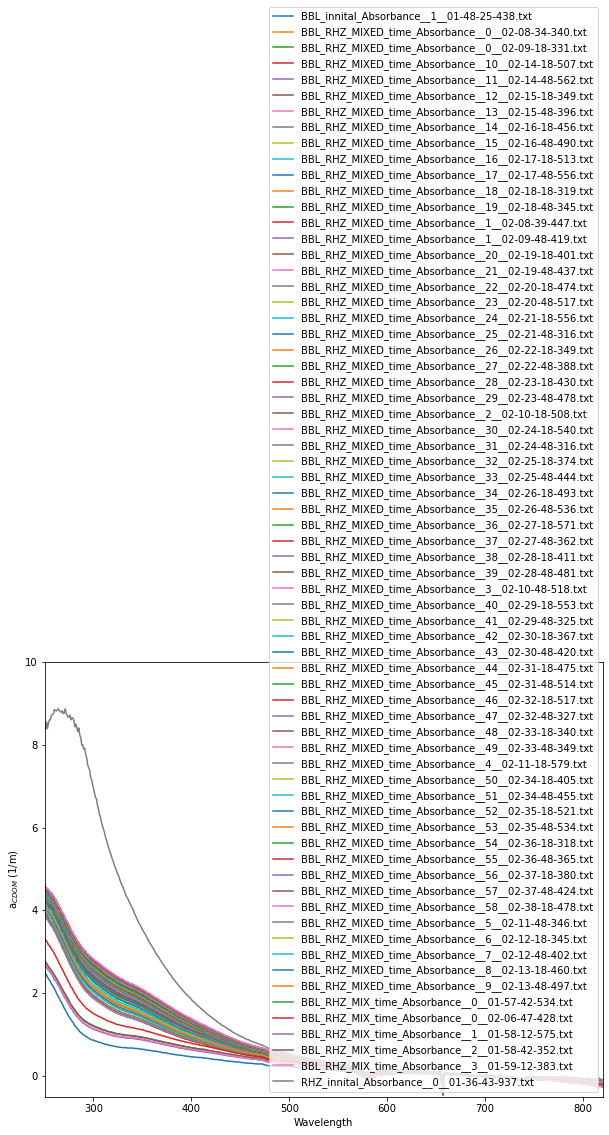

In [33]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.5,10)
ax.set_xlim(250,820)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [34]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [40]:
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 

df['wl'] = df.index
df

,BBL_innital_Absorbance__1__01-48-25-438.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt,BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt,BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt,BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt,BBL_RHZ_MIXED_time_Absorbance__12__02-15-18-349.txt,BBL_RHZ_MIXED_time_Absorbance__13__02-15-48-396.txt,BBL_RHZ_MIXED_time_Absorbance__14__02-16-18-456.txt,BBL_RHZ_MIXED_time_Absorbance__15__02-16-48-490.txt,BBL_RHZ_MIXED_time_Absorbance__16__02-17-18-513.txt,...,BBL_RHZ_MIXED_time_Absorbance__7__02-12-48-402.txt,BBL_RHZ_MIXED_time_Absorbance__8__02-13-18-460.txt,BBL_RHZ_MIXED_time_Absorbance__9__02-13-48-497.txt,BBL_RHZ_MIX_time_Absorbance__0__01-57-42-534.txt,BBL_RHZ_MIX_time_Absorbance__0__02-06-47-428.txt,BBL_RHZ_MIX_time_Absorbance__1__01-58-12-575.txt,BBL_RHZ_MIX_time_Absorbance__2__01-58-42-352.txt,BBL_RHZ_MIX_time_Absorbance__3__01-59-12-383.txt,RHZ_innital_Absorbance__0__01-36-43-937.txt,wl
wl,,,,,,,,,,,,,,,,,,,,,
189.2794,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087,189.2794
189.6618,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087,189.6618
190.0441,-2.484692,-1.916492,-1.571986,-1.815500,-2.240234,-2.315742,-2.559728,-2.268077,-2.569638,-1.455420,...,-2.371429,-2.023148,-2.153871,2.381340,-1.200108,-0.476645,-1.071744,-0.835781,6.504087,190.0441
190.4264,1.328000,-3.738128,-4.806569,-5.415353,-5.571089,-5.838199,-5.526256,-6.083601,-5.304451,-6.157693,...,-4.882077,-5.559291,-5.459243,-3.207683,-5.169480,-4.468198,-4.458287,-4.333227,-3.363890,190.4264
190.8087,-0.332236,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-3.906133,-0.000000,-0.000000,-0.000000,-1.568683,-1.493175,190.8087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,0.545547,0.235491,0.145825,0.200569,0.052856,0.269942,-0.067014,0.056631,-0.039642,0.256728,...,0.152432,0.268054,0.018405,0.261447,0.235963,0.307696,0.397362,0.154792,0.405857,880.5978
880.8884,0.681461,0.478061,0.586604,0.259559,0.249649,0.263335,0.302977,0.218974,0.256256,0.300617,...,0.330348,0.210951,0.338843,0.836253,0.235963,0.388395,0.634741,0.503073,0.432284,880.8884
881.1790,0.706002,0.248705,0.456825,-0.015574,0.111375,0.016517,0.097217,0.001416,-0.001888,0.109487,...,0.050024,0.048608,0.105711,0.369046,0.357248,0.078812,0.490803,0.165646,0.356776,881.1790


In [41]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [42]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [43]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_295 has a bad R2 !!!
THE FITS ARE GOOD, YAY!


In [44]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [45]:
Frames = []
maxfev = 1000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (1, 10, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [46]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_295 has a bad R2 !!!
THE FITS ARE GOOD, YAY!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [47]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [48]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [49]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [50]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs 
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
BBL_innital_Absorbance__1__01-48-25-438.txt,0.006330,0.056237,0.004940,1.768378,14.949389,0.835870,2.057051,1.832718,1.573949,1.177533,1.096060,2.144125,1.859766,1.567742,1.172620,1.095640,11.384917,17.884816,NaN
BBL_RHZ_MIXED_time_Absorbance__0__02-08-34-340.txt,0.008148,0.031716,0.006830,2.420118,8.009303,1.544751,3.637845,3.009052,2.326595,1.392366,1.221630,3.870108,3.067488,2.304382,1.389226,1.229584,4.643861,5.184851,0.126479
BBL_RHZ_MIXED_time_Absorbance__0__02-09-18-331.txt,0.008080,0.036876,0.006244,2.395444,9.480007,1.325192,3.574159,2.959740,2.291368,1.372596,1.203940,3.800995,3.017145,2.269711,1.369271,1.211532,5.905894,7.153684,0.116301
BBL_RHZ_MIXED_time_Absorbance__10__02-14-18-507.txt,0.007958,0.033309,0.005697,2.337394,8.463587,1.120596,3.940958,3.258301,2.512655,1.479933,1.288846,4.183388,3.318508,2.488134,1.477027,1.298134,5.847212,7.552756,0.144444
BBL_RHZ_MIXED_time_Absorbance__11__02-14-48-562.txt,0.007870,0.033284,0.005380,2.303961,8.454313,1.000549,3.938411,3.263491,2.524118,1.494512,1.302906,4.177095,3.323099,2.499930,1.491401,1.311944,6.186897,8.449670,0.177321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BBL_RHZ_MIX_time_Absorbance__0__02-06-47-428.txt,0.006498,0.043793,0.005038,1.805410,11.434781,0.873914,2.917787,2.524844,2.074132,1.390874,1.251952,3.059102,2.566105,2.062035,1.384694,1.253549,8.692848,13.084568,0.062340
BBL_RHZ_MIX_time_Absorbance__1__01-58-12-575.txt,0.005713,0.051574,0.004920,1.497800,13.639175,0.826100,2.180282,1.916907,1.606738,1.112872,1.007291,2.271096,1.945124,1.599455,1.107493,1.007207,10.482381,16.510314,0.049445
BBL_RHZ_MIX_time_Absorbance__2__01-58-42-352.txt,0.005506,0.049905,0.002803,1.411833,13.161938,0.040554,2.354234,2.083793,1.763077,1.245732,1.133667,2.445102,2.112296,1.755762,1.240088,1.133454,17.801958,324.557042,0.046850
